In [1]:
# Importar dependências
import gempy as gp
import gempy_viewer as gpv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../../input/Santos_Basin/Lake_PreSal_Santos_Basin_Well/v2/gempy_3/"

Setting Backend To: AvailableBackends.numpy


## Step by step

In [2]:
geo_model: gp.data.GeoModel = gp.create_geomodel(
    project_name="Santos_Outer_High_PreSal_Lake_v2.0.0",
    extent=[0, 4000, 0, 12000, -2000, 300],
    resolution=[80, 80, 80],
    importer_helper=gp.data.ImporterHelper(
        path_to_orientations=data_path + "orientations_points_workflow_Lake_Presal_V2.csv",
        path_to_surface_points=data_path + "surfaces_points_workflow_Lake_Presal_V2.csv",
    ),
)

In [ ]:
#geo_model.structural_frame

In [3]:
gp.map_stack_to_surfaces(
    gempy_model=geo_model,
    mapping_object=  # TODO: This mapping I do not like it too much. We should be able to do it passing the data objects directly
    {
        "Strat_1_Series": (
            'ARIRI',
            'UBV',
            ),
        "Strat_2_Series": (
            'LBV',
            'ITAPEMA',
            ),
    }
)

#geo_model.structural_frame

StructuralFrame(
	structural_groups=[
StructuralGroup(
	name=Strat_1_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=ARIRI,
	color=#015482,
	is_active=True
),
Element(
	name=UBV,
	color=#728f02,
	is_active=True
)
]
),
StructuralGroup(
	name=Strat_2_Series,
	structural_relation=StackRelationType.ERODE,
	elements=[
Element(
	name=LBV,
	color=#ffbe00,
	is_active=True
),
Element(
	name=ITAPEMA,
	color=#9f0052,
	is_active=True
)
]
)
],
	fault_relations=
[[False, False],
 [False, False]],

In [ ]:
#geo_model.grid

In [ ]:
#gpv.plot_2d(geo_model, direction="y", show_data=True, show_lith=False, ve=3, legend=True)
gpv.plot_2d(geo_model, direction="x", show_data=True, show_lith=False, ve=2, legend=True, figsize=(10, 15))

In [ ]:
gempy_vista_premodel = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    active_scalar_field=None,
    ve=5,
    show_data=True,
    show_results=True,
    show_surfaces=False,
    show_lith=True,
    show_scalar=True,
    show_boundaries=True,
    show_topography=False,
    show_section_trace=True,
    show_values=True,
    show_block=False,
    show=True  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_premodel.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
plotter.show_grid()
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
plotter.border_color = "black" 

# Show the plot
plotter.show

In [ ]:
"""bounds = [0.0, 179000.0, 0.0, 148000.0, -20000, 500]

# Calculate midpoints
mid_x = (bounds[0] + bounds[1]) / 2
mid_y = (bounds[2] + bounds[3]) / 2

# Set section grid
gp.set_section_grid(
    grid=geo_model.grid,
    section_dict={
        'section1': ([bounds[0], mid_y], [bounds[1], mid_y], [200, 150])
    }
)"""

In [ ]:
#gpv.plot_section_traces(geo_model)

In [ ]:
#bes_series = geo_model.structural_frame.get_group_by_name("Strat_Series")

In [ ]:
"""gp.modify_surface_points(
    geo_model=geo_model,
    elements_names=["bes_89", "bes_90", "bes_91", "bes_92", "bes_93", "bes_94", "bes_95", "bes_96", "bes_97", "bes_98", "bes_99", "bes_100"],
    nugget=0.01
)"""

In [ ]:
#geo_model.interpolation_options

In [ ]:
"""geo_model.interpolation_options.number_octree_levels = 5
geo_model.interpolation_options.number_octree_levels_surface = 4
geo_model.interpolation_options.kernel_options.range = .8"""

In [ ]:
#print(geo_model.structural_frame)

In [4]:
model = gp.compute_model(
    geo_model)

Setting Backend To: AvailableBackends.numpy


In [ ]:
"""model = gp.compute_model(
    geo_model,
    engine_config=gp.data.GemPyEngineConfig(
        backend=gp.data.AvailableBackends.PYTORCH, # Padrão é numpy, só comentar essa parte
        use_gpu=True, # para usar o GPU (não sei se funciona sem CUDA - testar)
        #dtype="float64", "float32"
    ))"""

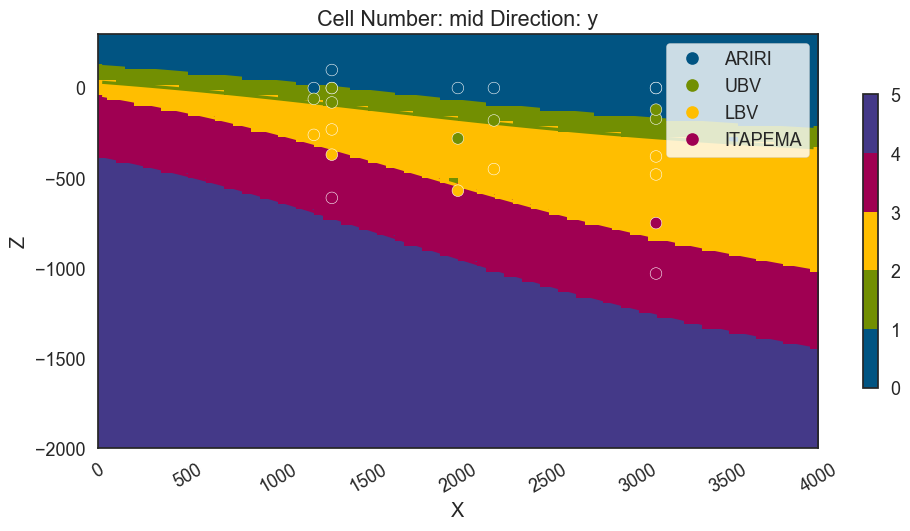

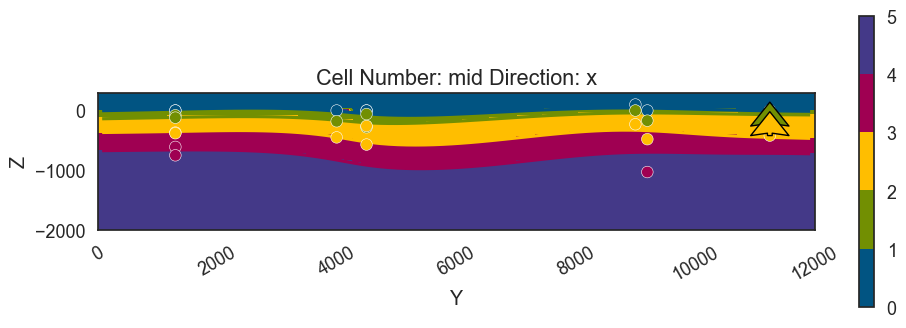

In [13]:
gpv.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=1, legend=True)
gpv.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=1, legend=False)

In [14]:
gempy_vista_model = gpv.plot_3d(
    geo_model,
    plotter_type="basic",  # Use 'notebook' instead of 'basic'
    ve=1,
    show_values=False,
    show_block=True,
    show=False  # This prevents the plot from being shown immediately
)

# 
plotter = gempy_vista_model.p

# Adiciona uma luz
#plotter.enable_eye_dome_lighting()

# Customize the plot
#plotter.show_grid(all_edges=False)
plotter.show_bounds(font_size=6, location="furthest") # show_xaxis=False, show_yaxis=False, show_zaxis=Falsehttps://docs.pyvista.org/version/stable/api/plotting/_autosummary/pyvista.renderer.show_bounds#pyvista.Renderer.show_bounds
#plotter.add_text("BES", position=(500, 700, 1000), font_size=20)
plotter.set_background("white")
#plotter.border_color = "black" 

# Show the plot
plotter.show()

In [ ]:
gempy_vista_model

In [ ]:
"""import pickle
with open('geo_model.pkl', 'wb') as f:
    pickle.dump(geo_model, f)"""

In [ ]:
#gpv.plot_2d(geo_model, show_topography=False, section_names=['meio'], show_lith=True)

In [ ]:
"""gpv.plot_2d(geo_model, cell_number=[4], direction=['y'], show_topography=True, show_data=True)
gpv.plot_2d(geo_model, cell_number=[-4], direction=['y'], show_topography=True, show_data=True)"""

In [ ]:
#gpv.plot_3d(geo_model, show_lith=True, show_topography=False, kwargs_plot_structured_grid={'opacity': 0.8})